In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython: from IPython import  display


avg_episodes = []


In [19]:
durations = np.load('durations-test6.npy', allow_pickle=True)
durations.tolist()
print(durations.item().get('batch_size'))
episode_durations = durations.item().get('episode_durations')


None


In [3]:
def plot(values, moving_avg_period):
    with plt.style.context(['science', 'std-colors', 'no-latex']):
        plt.figure(2)
        plt.clf()
        plt.title("Training...")
        plt.xlabel('Episode')
        plt.ylabel('Duration')
        plt.grid()
        plt.plot(values)

        moving_avg = get_moving_average(moving_avg_period, values)
        plt.plot(get_moving_average(moving_avg_period, values))
        #plt.savefig('fig2.pdf')
        plt.pause(0.001)

        print("Episode", len(values), "\n",
              moving_avg_period, "episode moving avg:", moving_avg[-1])
        print("Current Duration:", values[-1])
        print("Max duration:", np.max(values), "Episode:", np.argmax(values))
        print("Max Avg Period:", np.max(moving_avg), "Episode:", np.argmax(moving_avg))
        if is_ipython:
            display.clear_output(wait=True)
            return moving_avg

def get_moving_average(period, values):
    values = torch.tensor(values, dtype=torch.float)
    if len(values) >= period:
        moving_avg = values.unfold(dimension=0, size=period, step=1).mean(dim=1).flatten(start_dim=0)
        moving_avg = torch.cat((torch.zeros(period-1), moving_avg))
        return moving_avg.numpy()
    else:
        moving_avg = torch.zeros(len(values))
        return moving_avg.numpy()

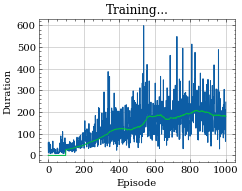

Episode 1000 
 100 episode moving avg: 181.21
Current Duration: 246
Max duration: 599 Episode: 537
Max Avg Period: 208.88 Episode: 837


In [20]:
avg = plot(episode_durations, 100)



In [21]:
avg_episodes.append(avg)

In [22]:
final_mean = np.mean(avg_episodes, axis=0)
final_std = np.std(avg_episodes, axis=0)
print(final_mean.shape)
print(final_std.shape)
x = np.linspace(0, 999, 1000, endpoint=True)

(1000,)
(1000,)


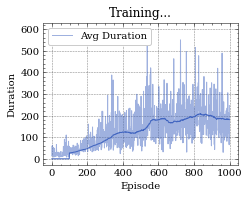

In [64]:
with plt.style.context(['science', 'retro', 'grid', 'no-latex']):
    plt.figure(2)
    plt.clf()
    plt.title("Training...")
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # plt.plot(final_mean)
    plt.plot(episode_durations, color=cycle[0], alpha=0.5)
    plt.legend(['Avg Duration'], loc='upper left')
    # plt.fill_between(x, final_mean + final_std, final_mean - final_std, alpha=0.5)
    plt.plot(avg, color=cycle[0])
    # plt.grid()
    plt.savefig('test-colors3.pdf')

In [63]:
tuple = (1, 2)
new_tuple = tuple + (3,)
print(new_tuple)

(1, 2, 3)
